In [ ]:
import pandas as pd
import numpy as np
data = np.array([
    [2.5,2.4,1.2],
    [0.5,0.7,0.3],
    [2.2,2.9,1.4],
    [1.9,2.2,1.1],
    [3.1,3.0, 1.7],
    [2.3,2.7,1.5],
    [2.0,1.6,0.9],
    [1.0,1.1,0.4],
    [1.5,1.6,0.8],
    [1.1,0.9,0.2],
])
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])
df


,X,Y,Z
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,1.4
3,1.9,2.2,1.1
4,3.1,3.0,1.7
5,2.3,2.7,1.5
6,2.0,1.6,0.9
7,1.0,1.1,0.4
8,1.5,1.6,0.8
9,1.1,0.9,0.2


In [ ]:
a=np.array([2.0,2.1,1.9])

In [ ]:
df=df+a

In [ ]:
df

,X,Y,Z
0,6.5,6.6,5.0
1,4.5,4.9,4.1
2,6.2,7.1,5.2
3,5.9,6.4,4.9
4,7.1,7.2,5.5
5,6.3,6.9,5.3
6,6.0,5.8,4.7
7,5.0,5.3,4.2
8,5.5,5.8,4.6
9,5.1,5.1,4.0


In [ ]:
standardized_data = (df-df.mean())/df.std()
standardized_data

,X,Y,Z
0,0.878745,0.578857,0.477697
1,-1.668342,-1.429422,-1.242013
2,0.496682,1.169527,0.859855
3,0.114619,0.342589,0.286618
4,1.642872,1.287661,1.433092
5,0.624036,0.933259,1.050934
6,0.241973,-0.366216,-0.095539
7,-1.031570,-0.956886,-1.050934
8,-0.394799,-0.366216,-0.286618
9,-0.904216,-1.193154,-1.433092


In [ ]:
cov_matrix=np.cov(standardized_data,rowvar=False)
cov_matrix

array([[1.        , 0.92592927, 0.93688744],
       [0.92592927, 1.        , 0.98192228],
       [0.93688744, 0.98192228, 1.        ]])

In [ ]:
eig_values, eig_vectors = np.linalg.eigh(cov_matrix)
eig_values
print(eig_vectors)

array([0.01747311, 0.08582574, 2.89670115])

In [ ]:
sorted_indices = np.argsort(eig_values)[::-1]
sorted_eigenvalues = eig_values[sorted_indices]
sorted_eigenvectors = eig_vectors[:, sorted_indices]
sorted_eigenvectors

array([[-0.57041595, -0.81767389, -0.07768556],
       [-0.57969966,  0.46779003, -0.66717374],
       [-0.58187108,  0.33553224,  0.74084017]])

In [ ]:
eigs_vecs_subset = sorted_eigenvectors[:, :2]
eigs_vecs_subset

array([[-0.57041595, -0.81767389],
       [-0.57969966,  0.46779003],
       [-0.58187108,  0.33553224]])

In [ ]:

reduced_df = pd.DataFrame(np.dot(standardized_data, eigs_vecs_subset), columns=['PC1', 'PC2'])
reduced_df


,PC1,PC2
0,-1.114772,-0.287461
1,2.502976,0.278755
2,-1.461615,0.429478
3,-0.430754,0.162708
4,-2.517452,-0.260130
5,-1.508478,0.278933
6,0.129861,-0.401224
7,1.754639,0.043244
8,0.604269,0.055335
9,2.041325,-0.299640


In [ ]:
import matplotlib.pyplot as plt
print(reduced_df)

        PC1       PC2
0 -1.114772 -0.287461
1  2.502976  0.278755
2 -1.461615  0.429478
3 -0.430754  0.162708
4 -2.517452 -0.260130
5 -1.508478  0.278933
6  0.129861 -0.401224
7  1.754639  0.043244
8  0.604269  0.055335
9  2.041325 -0.299640


Text(0, 0.5, 'PC2')

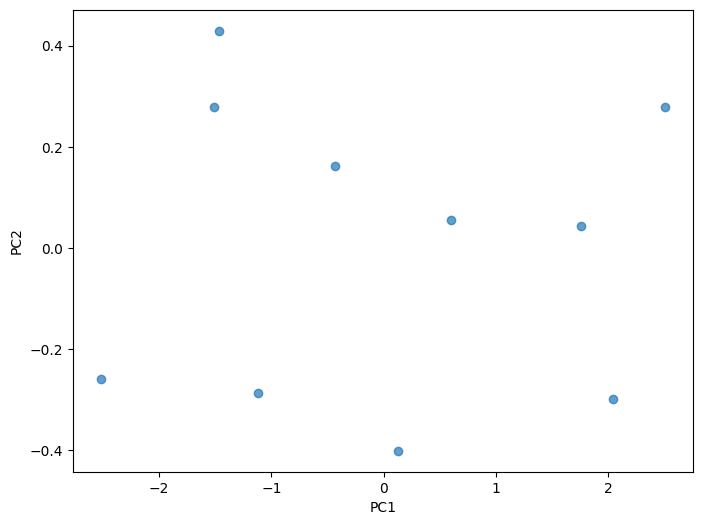

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')